In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [3]:
#useful properties
# iris.feature_names
# iris.data
# iris.target
# iris.target_names
# type(iris.data)
# type(iris.target)
# iris.data.shape
# iris.target.shape

In [4]:
X = iris.data
y = iris.target

In [5]:
import numpy  as np
import pandas as pd

iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


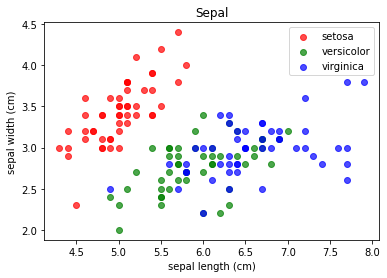

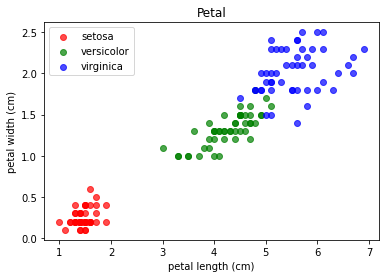

In [8]:
import matplotlib.pyplot as plt
plt.title("Sepal")
plt.scatter(X[y==0, 0], X[ y==0 , 1], c="red", label="setosa", alpha=0.7)
plt.scatter(X[y==1, 0], X[ y==1 , 1], c="green", label="versicolor", alpha=0.7)
plt.scatter(X[y==2, 0], X[ y==2 , 1], c="blue", label="virginica", alpha=0.7)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

plt.title("Petal")
plt.scatter(X[y==0, 2], X[y==0, 3], c="red", label="setosa", alpha=0.7)
plt.scatter(X[y==1, 2], X[y==1, 3], c="green", label="versicolor", alpha=0.7)
plt.scatter(X[y==2, 2], X[y==2, 3], c="blue", label="virginica", alpha=0.7)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()

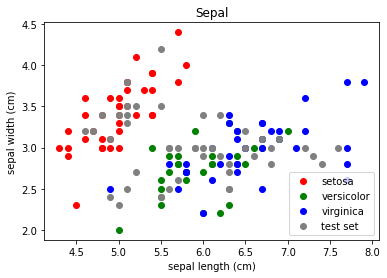

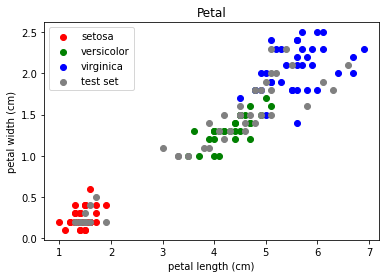

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)  
#please note that putting randomstate=42 gets 1.0 accuracy on 2/3 classifiers

plt.title("Sepal")
plt.scatter(X_train[y_train==0, 0], X_train[ y_train==0 , 1], c="red", label="setosa")
plt.scatter(X_train[y_train==1, 0], X_train[ y_train==1 , 1], c="green", label="versicolor")
plt.scatter(X_train[y_train==2, 0], X_train[ y_train==2 , 1], c="blue", label="virginica")
plt.scatter(X_test[:, 0], X_test[ : , 1], c="grey", label="test set")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

plt.title("Petal")
plt.scatter(X_train[y_train==0, 2], X_train[y_train==0, 3], c="red", label="setosa")
plt.scatter(X_train[y_train==1, 2], X_train[y_train==1, 3], c="green", label="versicolor")
plt.scatter(X_train[y_train==2, 2], X_train[y_train==2, 3], c="blue", label="virginica")
plt.scatter(X_test[:, 2], X_test[ : , 3], c="grey", label="test set")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()

In [7]:
#in this code I tested 4 different classifiers:
#clf is a RFC trained on the whole dataset;
#clf_a is a RFC trained on the sepal features;
#clf_b is a RFC trained on the petal features;
#voting_clf is a SVC trained on clf_a and clf_b

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1).fit(X_train, y_train)
clf_a = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1).fit(X_train[:,:2], y_train)
clf_b = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1).fit(X_train[:,2:], y_train)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('sepal', clf_a), ('petal', clf_b)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('sepal',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('petal',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=500,
                                                     n_jobs=-1))])

In [8]:
from sklearn import metrics
print("Accuracy (clf):",metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Accuracy  (clf_):",metrics.accuracy_score(y_test, clf_a.predict(X_test[:,:2])))
print("Accuracy (clf_b):",metrics.accuracy_score(y_test, clf_b.predict(X_test[:,2:])))
print("Accuracy (svc):",metrics.accuracy_score(y_test, voting_clf.predict(X_test)))

Accuracy (clf): 0.9555555555555556
Accuracy  (clf_): 0.7555555555555555
Accuracy (clf_b): 1.0
Accuracy (svc): 0.9555555555555556


In [9]:
#BAGGING - auto soft vote
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
     max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("Accuracy (bag):",metrics.accuracy_score(y_test, voting_clf.predict(X_test)))
print("BaggingClassifier(oob) =",bag_clf.oob_score_)


Accuracy (bag): 0.9555555555555556
BaggingClassifier(oob) = 0.9333333333333333


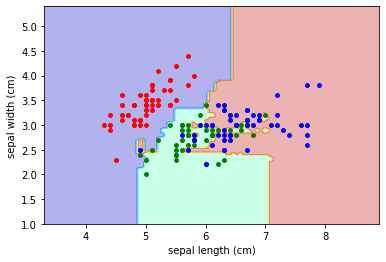

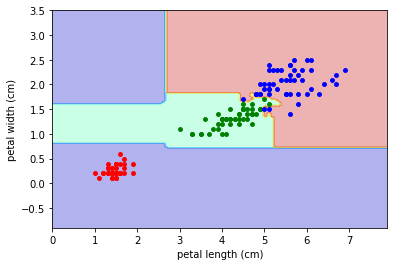

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
            clf_a, X[:,:2], alpha=0.3, response_method="predict", cmap="jet"
        )

plt.scatter(X[y == 0, 0], X[y == 0, 1], c="red",alpha=1, s=15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="green",alpha=1, s=15)
plt.scatter(X[y == 2, 0], X[y == 2, 1], c="blue",alpha=1, s=15)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()
    
DecisionBoundaryDisplay.from_estimator(
            clf_b, X[:,2:], alpha=0.3, response_method="predict", cmap="jet"
        )

plt.scatter(X[y == 0, 2], X[y == 0, 3], c="red",alpha=1, s=15)
plt.scatter(X[y == 1, 2], X[y == 1, 3], c="green",alpha=1, s=15)
plt.scatter(X[y == 2, 2], X[y == 2, 3], c="blue",alpha=1, s=15)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

plt.show()

In [11]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.461864
petal length (cm)    0.423175
sepal length (cm)    0.090540
sepal width (cm)     0.024421
dtype: float64

petal width (cm)     0.461864
petal length (cm)    0.423175
sepal length (cm)    0.090540
sepal width (cm)     0.024421
dtype: float64


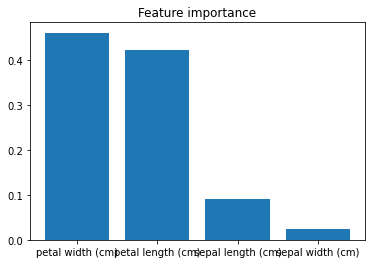

In [12]:
%matplotlib inline

print(feature_imp)

# Creating a bar plot
plt.bar(feature_imp.index, feature_imp.values,)

# Add labels to your graph
#plt.xlabel('Feature Importance Score')
#plt.ylabel('Features')
plt.title("Feature importance")
#plt.legend()
plt.show()